In [4]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('mobile_price_train.csv')
df_test = pd.read_csv('mobile_price_test.csv')

In [5]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [19]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

In [7]:
df_train.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [8]:
df_train.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [9]:
df_train.shape

(2000, 21)

In [10]:
#Import the algorithms to train model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Features
X = df_train.drop('price_range',axis='columns')     #axis=columns:- to drop column, axis='rows':- to drop rows
#Labels
Y = df_train[['price_range']]


#Train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_scaled = sc.fit_transform(xtrain)
xtest_scaled = sc.transform(xtest)

model1 = OneVsRestClassifier(LogisticRegression(max_iter=200))
model1.fit(xtrain_scaled,ytrain)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=200))

In [12]:
#Accuracy score
print("Accuracy for training>>>>>>> ",model1.score(xtrain_scaled,ytrain))
print("Accuracy for testing>>>>>>>> ",model1.score(xtest_scaled,ytest))

Accuracy for training>>>>>>>  0.865625
Accuracy for testing>>>>>>>>  0.8375


In [13]:
# ytest_pred_prob = model1.predict_proba(xtest_scaled)

# (ytest == ytest_pred_prob).sum()/len(xtest_scaled)

import numpy as np
ytest_pred_prob = model1.predict_proba(xtest_scaled)

# Get the predicted class labels
ytest_pred = np.argmax(ytest_pred_prob, axis=1)

# Convert ytest to a 1D array for comparison
ytest_1d = ytest['price_range'].values

#Compare predicted class labels with true labels
(ytest_1d == ytest_pred).sum()/len(xtest_scaled)

0.8375

In [14]:
#roc curve for classes
fpr = {}
tpr ={}
thresh = {}

n_class = 4

for i in range(n_class):
  fpr[i],tpr[i],thresh[i] = roc_curve(ytest,ytest_pred_prob[:,i],pos_label=i)

In [15]:
fpr

{0: array([0.        , 0.        , 0.        , 0.00692042, 0.00692042,
        0.01038062, 0.01038062, 0.01384083, 0.01384083, 0.01730104,
        0.01730104, 1.        ]),
 1: array([0.      , 0.      , 0.      , 0.00625 , 0.00625 , 0.009375,
        0.009375, 0.015625, 0.015625, 0.01875 , 0.01875 , 0.021875,
        0.021875, 0.028125, 0.028125, 0.0375  , 0.0375  , 0.04375 ,
        0.04375 , 0.05625 , 0.05625 , 0.0625  , 0.0625  , 0.071875,
        0.071875, 0.084375, 0.084375, 0.090625, 0.090625, 0.09375 ,
        0.09375 , 0.1     , 0.1     , 0.109375, 0.109375, 0.1125  ,
        0.1125  , 0.115625, 0.115625, 0.128125, 0.128125, 0.1375  ,
        0.1375  , 0.140625, 0.140625, 0.1625  , 0.1625  , 0.16875 ,
        0.16875 , 0.171875, 0.171875, 0.18125 , 0.18125 , 0.19375 ,
        0.19375 , 0.203125, 0.203125, 0.371875, 0.371875, 0.409375,
        0.409375, 0.415625, 0.415625, 0.55625 , 0.55625 , 1.      ]),
 2: array([0.        , 0.        , 0.        , 0.00338983, 0.00338983,
   

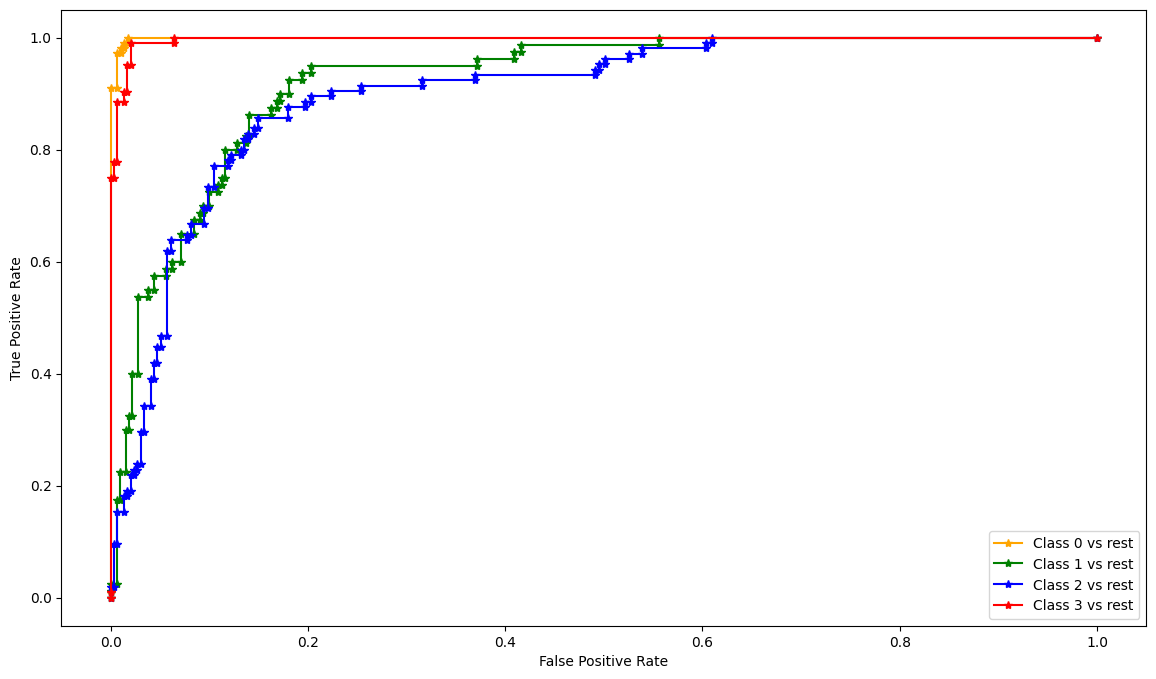

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

plt.plot(fpr[0] , tpr[0] , marker='*' , color='orange' , label='Class 0 vs rest')
plt.plot(fpr[1] , tpr[1] , marker='*' , color='green' , label='Class 1 vs rest')
plt.plot(fpr[2] , tpr[2] , marker='*' , color='blue' , label='Class 2 vs rest')
plt.plot(fpr[3] , tpr[3] , marker='*' , color='red' , label='Class 3 vs rest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,model1.predict(xtrain_scaled))

array([[388,   1,   0,   0],
       [ 27, 320,  73,   0],
       [  0,  85, 281,  29],
       [  0,   0,   0, 396]])

In [21]:
confusion_matrix(ytest,model1.predict(xtest_scaled))

array([[109,   2,   0,   0],
       [  6,  57,  17,   0],
       [  0,  25,  66,  14],
       [  0,   0,   1, 103]])

#Decision tree classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dmodel = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=20)

dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)

In [23]:
print(dmodel.score(xtrain,ytrain))
print(dmodel.score(xtest,ytest))

0.88
0.86


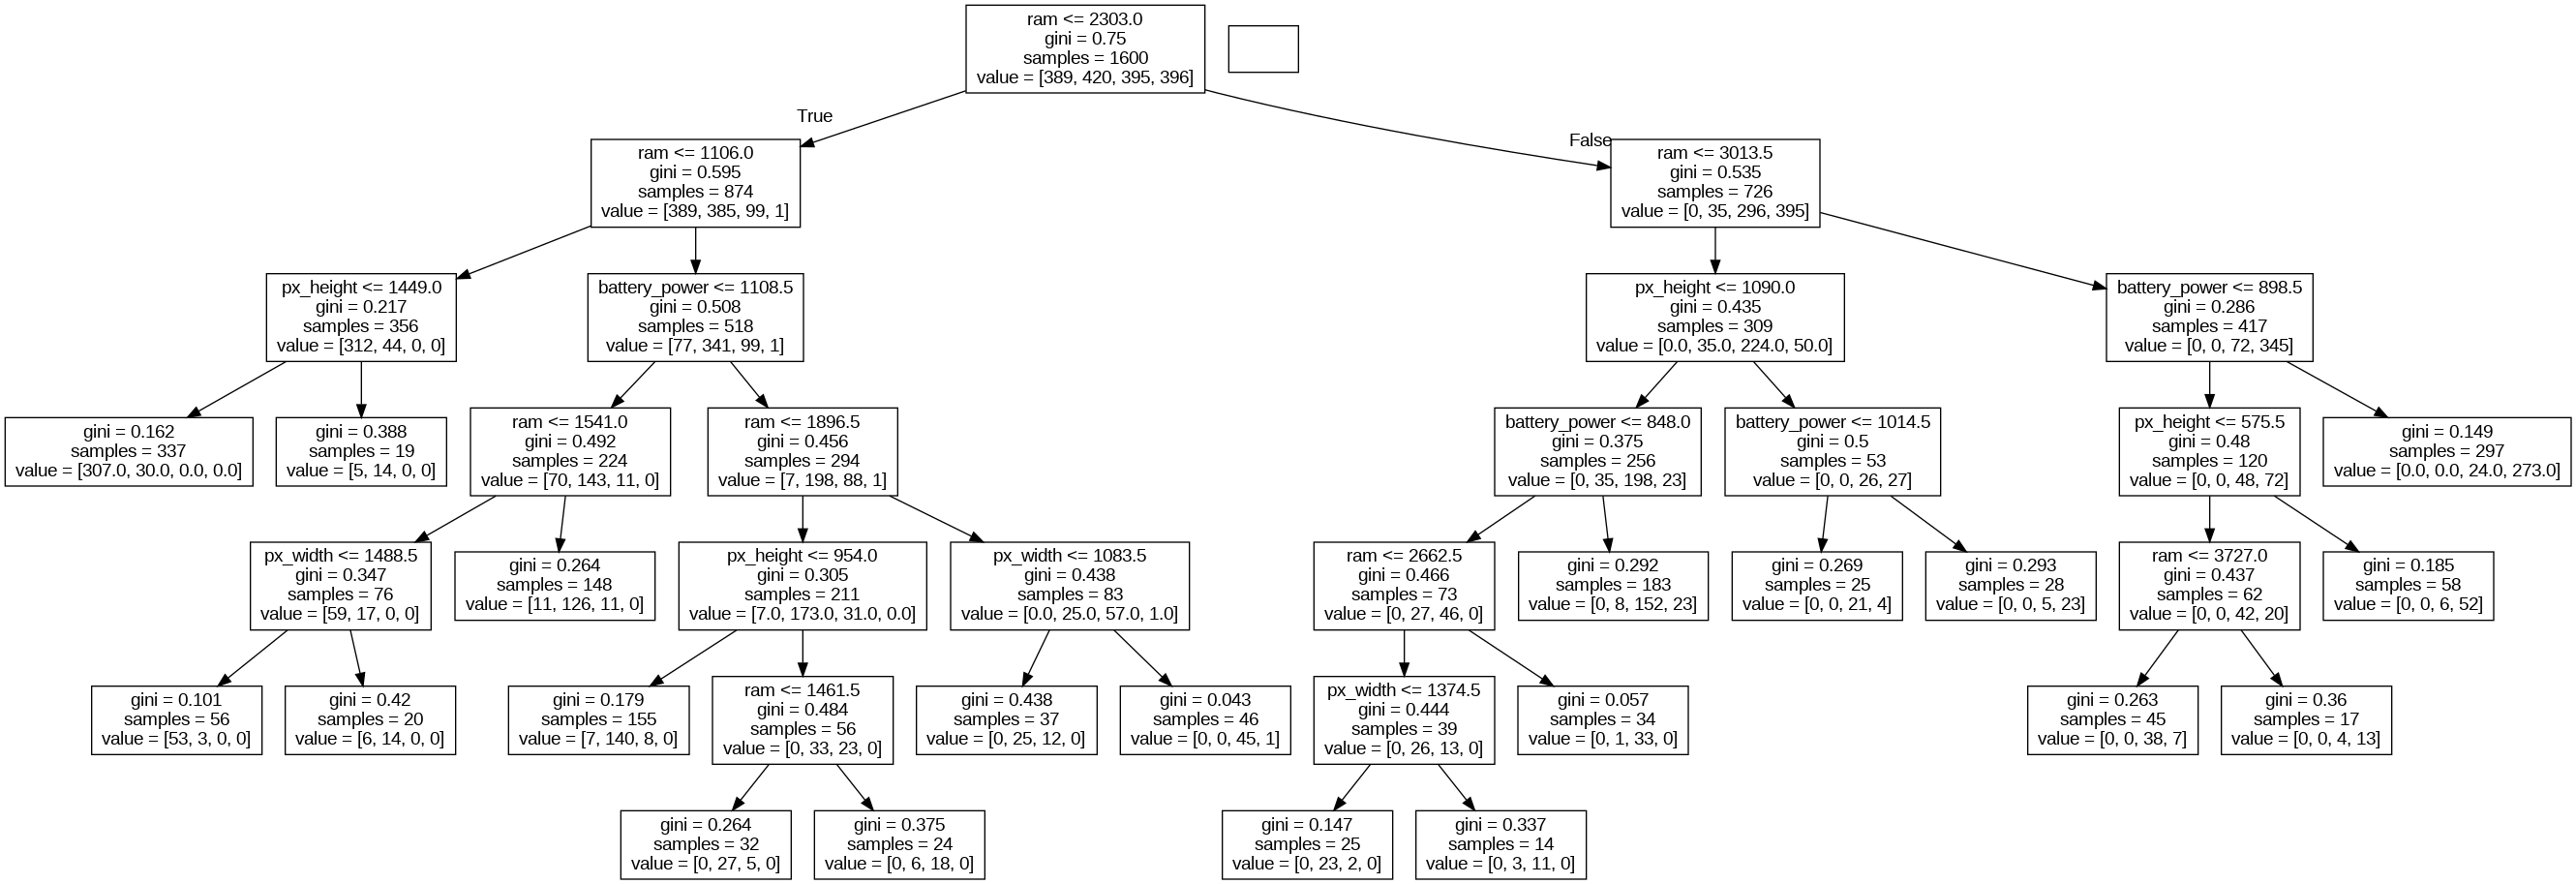

In [24]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dmodel,feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,dmodel.predict(xtrain))

array([[360,  29,   0,   0],
       [ 33, 369,  18,   0],
       [  0,  38, 318,  39],
       [  0,   0,  35, 361]])

In [28]:
confusion_matrix(ytest,dmodel.predict(xtest))

array([[103,   8,   0,   0],
       [  4,  65,  11,   0],
       [  0,  13,  83,   9],
       [  0,   0,  11,  93]])

In [29]:
ytest_pred_prob = dmodel.predict_proba(xtest)
ytest_pred_prob

array([[0.        , 0.        , 0.84444444, 0.15555556],
       [0.04516129, 0.90322581, 0.0516129 , 0.        ],
       [0.        , 0.92      , 0.08      , 0.        ],
       ...,
       [0.        , 0.        , 0.10344828, 0.89655172],
       [0.91097923, 0.08902077, 0.        , 0.        ],
       [0.26315789, 0.73684211, 0.        , 0.        ]])

In [30]:
#roc curve for classes
fpr = {}
tpr ={}
thresh = {}

n_class = 4

for i in range(n_class):
  fpr[i],tpr[i],thresh[i] = roc_curve(ytest,ytest_pred_prob[:,i],pos_label=i)

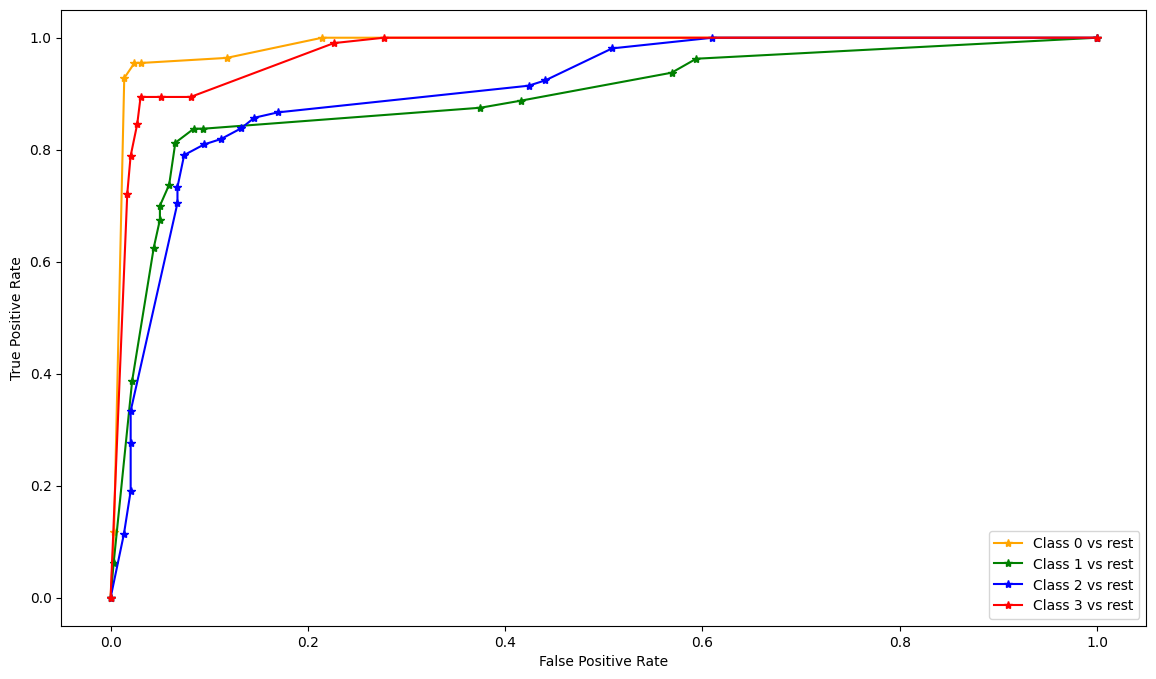

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

plt.plot(fpr[0] , tpr[0] , marker='*' , color='orange' , label='Class 0 vs rest')
plt.plot(fpr[1] , tpr[1] , marker='*' , color='green' , label='Class 1 vs rest')
plt.plot(fpr[2] , tpr[2] , marker='*' , color='blue' , label='Class 2 vs rest')
plt.plot(fpr[3] , tpr[3] , marker='*' , color='red' , label='Class 3 vs rest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

#Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators = 500,max_depth=9, max_leaf_nodes=20)


#ytrain = ytrain.values.ravel()
# ytest = ytest.values.ravel()
rmodel.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=9, max_leaf_nodes=20, n_estimators=500)

In [41]:
print(rmodel.score(xtrain,ytrain))
print(rmodel.score(xtest,ytest))

0.9125
0.82


In [42]:
len(xtrain.columns)

20

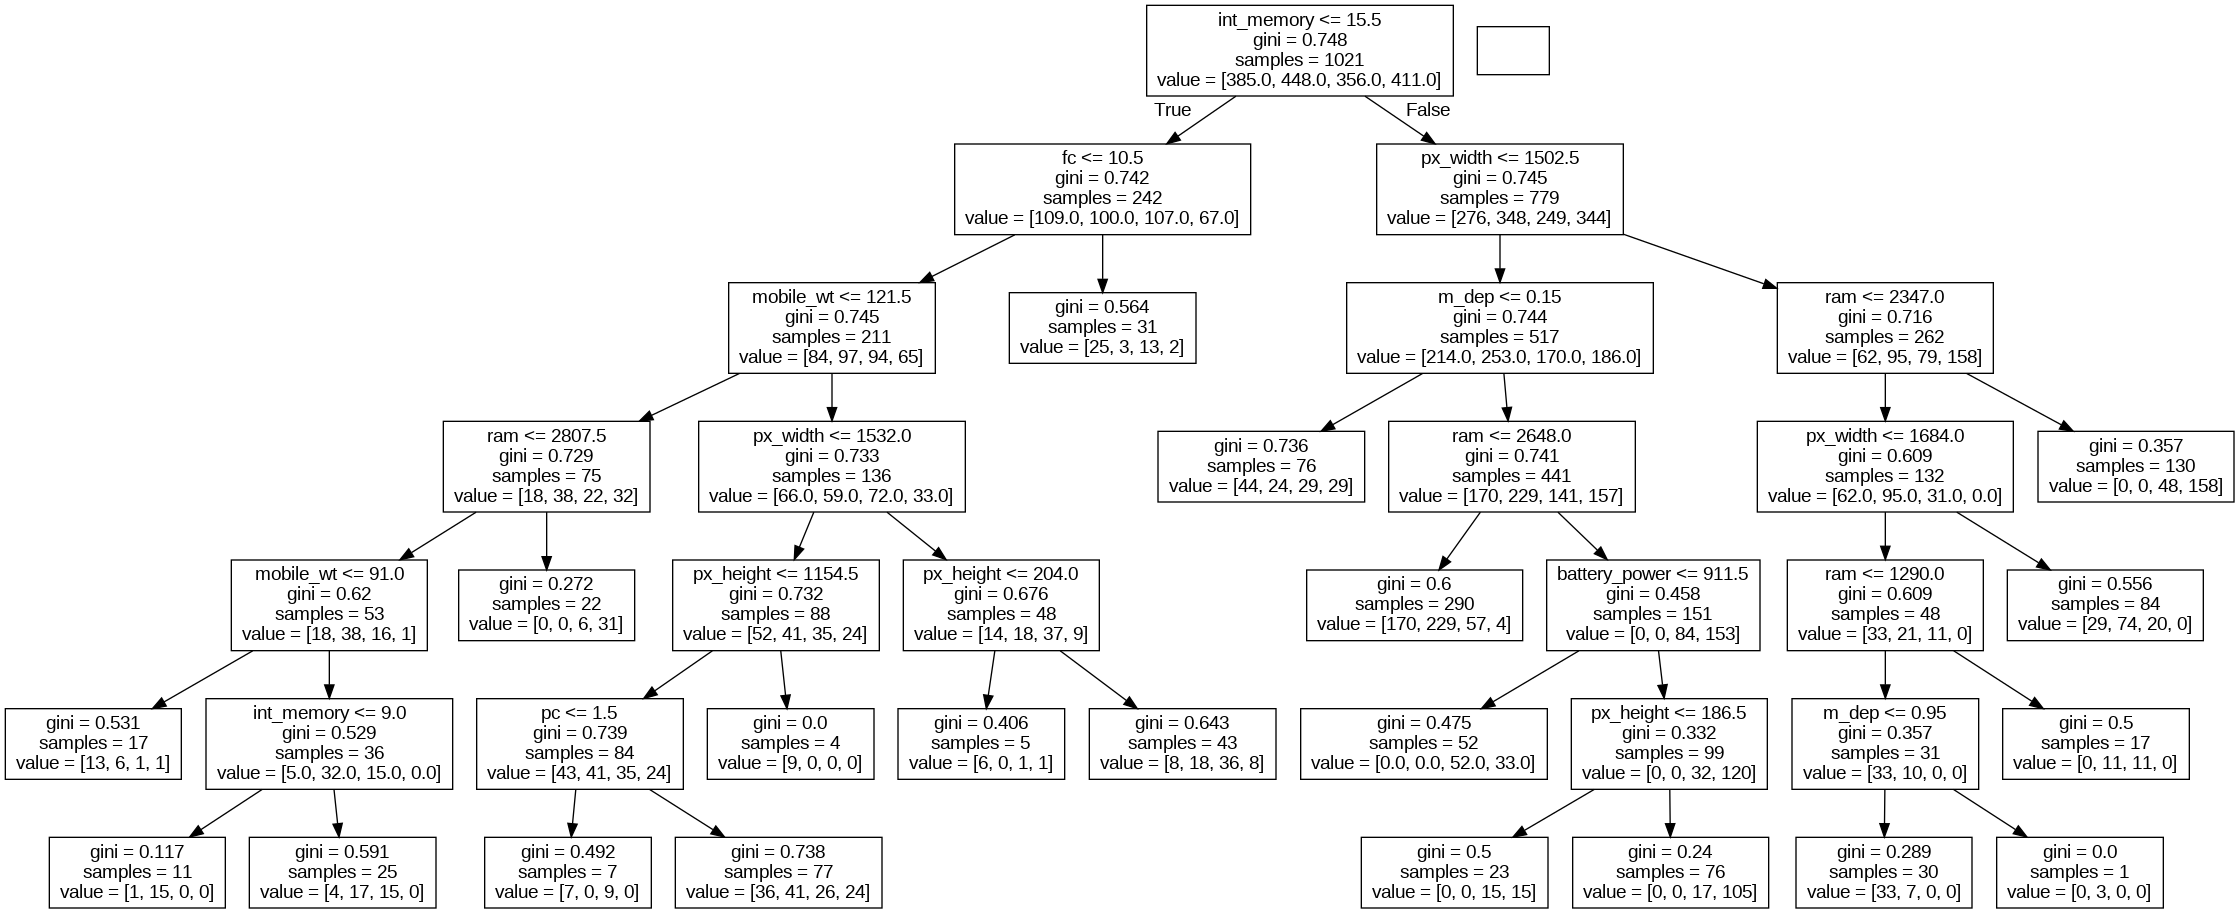

In [43]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(rmodel[499],feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Naive Bayes Algo

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nmodel = GaussianNB()

# xtrain_scaled = scaler.fit_transform(xtrain)
# xtest_scaled = scaler.transform(xtest)
nmodel.fit(xtrain,ytrain)

GaussianNB()

In [50]:
print(nmodel.score(xtrain,ytrain))
print(nmodel.score(xtest,ytest))

0.815625
0.79


In [51]:
confusion_matrix(ytrain,nmodel.predict(xtrain))

array([[352,  37,   0,   0],
       [ 34, 309,  77,   0],
       [  0,  74, 287,  34],
       [  0,   1,  38, 357]])

In [52]:
confusion_matrix(ytest,nmodel.predict(xtest))

array([[97, 14,  0,  0],
       [ 6, 59, 15,  0],
       [ 0, 20, 74, 11],
       [ 0,  0, 18, 86]])

In [54]:
ytest_pred_prob = nmodel.predict_proba(xtest)

ytest_pred_prob

array([[3.31327316e-13, 2.36302564e-04, 2.31780820e-01, 7.67982878e-01],
       [4.84632231e-02, 7.58894677e-01, 1.92609098e-01, 3.30017265e-05],
       [8.53281138e-05, 3.06368805e-01, 6.53947204e-01, 3.95986633e-02],
       ...,
       [3.98934292e-14, 2.02270690e-04, 1.45995274e-01, 8.53802455e-01],
       [9.47117117e-01, 5.26423462e-02, 2.40536989e-04, 6.17744359e-13],
       [6.39475856e-01, 3.59502222e-01, 1.02192222e-03, 1.93549528e-11]])

In [55]:
roc_auc_score(ytest,ytest_pred_prob,multi_class='ovr')

0.9441361178013326

In [56]:
#roc curve for classes
fpr = {}
tpr ={}
thresh = {}
auc={}

n_class = 4

for i in range(n_class):
  fpr[i],tpr[i],thresh[i] = roc_curve(ytest,ytest_pred_prob[:,i],pos_label=i)

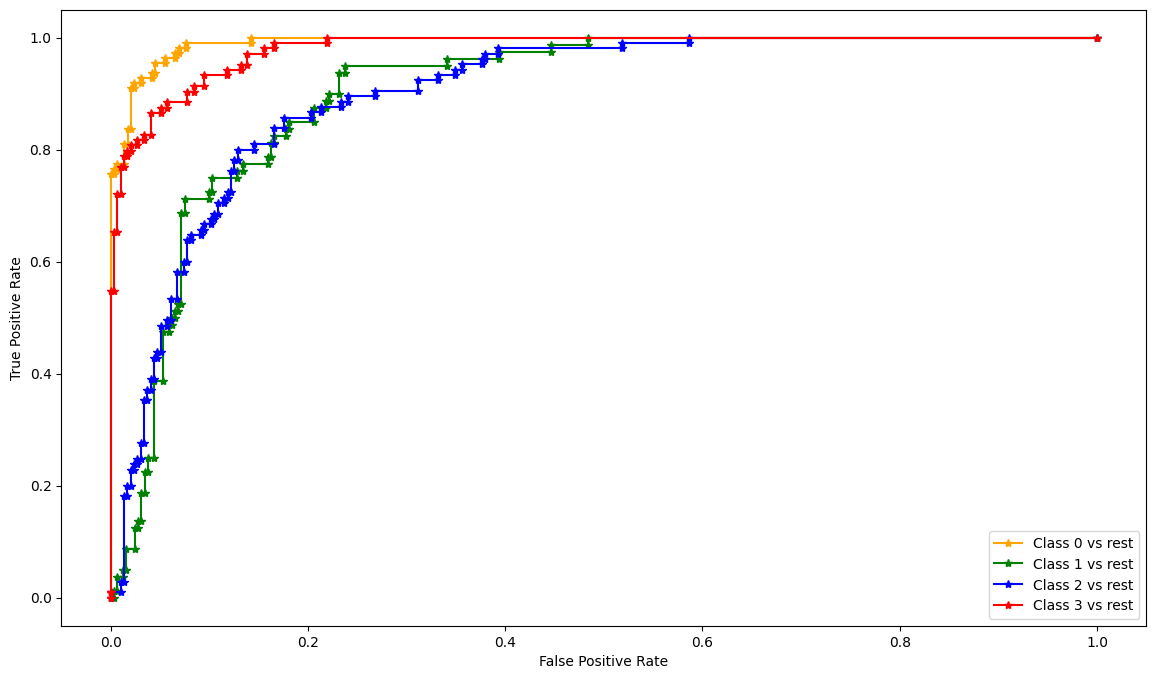

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

plt.plot(fpr[0] , tpr[0] , marker='*' , color='orange' , label='Class 0 vs rest')
plt.plot(fpr[1] , tpr[1] , marker='*' , color='green' , label='Class 1 vs rest')
plt.plot(fpr[2] , tpr[2] , marker='*' , color='blue' , label='Class 2 vs rest')
plt.plot(fpr[3] , tpr[3] , marker='*' , color='red' , label='Class 3 vs rest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()